In [129]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import mplcyberpunk
import seaborn as sns
from dateutil.relativedelta import relativedelta
import quantstats as qs

In [29]:
tickers = pd.read_excel("composicao_ibov.xlsx")
tickers

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,PETR3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,ITUB4,BBDC4,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,BBDC4,PETR3,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BEEF3,EZTC3,BEEF3,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,BIDI4,EZTC3,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,JHSF3,JHSF3,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,CASH3,CASH3,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN


In [30]:
#pegando lista de tickers

intervalo_tempo = tickers.columns
lista_tickers=[]

for mes in intervalo_tempo:
    tickers_no_mes = tickers[mes]
    tickers_no_mes = tickers_no_mes.dropna()
    tickers_no_mes = tickers_no_mes + ".SA"
    lista_tickers.append(tickers_no_mes)
    
lista_tickers_finais = pd.concat(lista_tickers)
lista_tickers_finais = lista_tickers_finais.drop_duplicates()
lista_tickers_finais = list(lista_tickers_finais)
lista_tickers_finais
    


['ABEV3.SA',
 'AMER3.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'EQTL3.SA',
 'FIBR3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'OIBR3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'UGPA3.SA',
 'USIM5.SA',
 'VALE3.SA',
 'VALE5.SA',
 'VIVT3.SA',
 'YDUQ3.SA',
 'WEGE3.SA',
 'ELET6.SA',
 'TAEE11.SA',
 'FLRY3.SA',
 'MGLU3.SA',
 'SAPR11.SA',
 'VVAR11.SA',
 'JPSA3.SA',
 'CVCB3.SA',
 'VIIA3.SA',
 'LOGG3.SA',
 'VBBR3.SA',
 'IRBR3.SA',
 'AZUL4.SA',
 'HAPV3.SA',
 'BPAC1

In [31]:
#puxando dados de cotação ajustado

dados_cotacoes = pdr.get_data_yahoo(symbols = lista_tickers_finais, 
                                    start = "2015-06-30", 
                                    end = "2022-08-31")['Adj Close']

dados_cotacoes

/Users/onizuka/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'HGTX3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/onizuka/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'JPSA3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/onizuka/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'LCAM3.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/onizuka/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BIDI11.SA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/onizuka/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BIDI4.SA', replacing with NaN.
  warnings.warn(m

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441734,19.304613,NaN,2.934543,24.056675,9.631708,9.540177,19.669222,5.087124,63.513851,...,NaN,NaN,NaN,1.940230,4.887101,NaN,NaN,NaN,NaN,NaN
2015-07-01,15.555574,18.623274,NaN,2.914425,23.749525,9.569738,9.509975,19.813761,4.976009,62.158154,...,NaN,NaN,NaN,2.007135,5.002923,NaN,NaN,NaN,NaN,NaN
2015-07-02,15.482391,18.831461,NaN,2.904368,23.680170,9.575681,9.704394,19.912046,4.961516,63.687504,...,NaN,NaN,NaN,1.978462,4.887101,NaN,NaN,NaN,NaN,NaN
2015-07-03,15.571835,18.594885,NaN,2.876707,23.452286,9.603235,9.593582,19.634527,4.860063,63.804401,...,NaN,NaN,NaN,1.949788,4.912526,NaN,NaN,NaN,NaN,NaN
2015-07-06,15.628758,19.683134,NaN,2.901852,23.630630,9.417233,9.405540,19.617184,4.806922,63.931038,...,NaN,NaN,NaN,1.940230,4.929476,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,15.820000,18.790001,14.10,12.691257,41.799999,16.136370,19.473202,28.150000,23.510000,16.469999,...,20.920000,3.92,36.950001,11.470000,47.889999,NaN,NaN,NaN,NaN,NaN
2022-08-26,15.670000,18.100000,14.11,12.353354,41.590000,16.056538,19.403336,28.400000,23.090000,16.530001,...,20.270000,3.84,37.080002,11.370000,48.349998,NaN,NaN,NaN,NaN,NaN
2022-08-29,15.610000,17.510000,14.19,12.263908,42.450001,16.106432,19.473202,28.219999,22.870001,16.370001,...,20.129999,3.79,37.799999,11.570000,48.509998,NaN,NaN,NaN,NaN,NaN


In [32]:
#resample pra mensal

ultima_linha = dados_cotacoes.iloc[-1:]
dados_cotacoes_mensais = dados_cotacoes.resample("M").last()

dados_cotacoes_mensais

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441734,19.304613,NaN,2.934543,24.056675,9.631708,9.540177,19.669222,5.087124,63.513851,...,NaN,NaN,NaN,1.940230,4.887101,NaN,NaN,NaN,NaN,NaN
2015-07-31,15.832044,17.118650,NaN,2.630275,21.847185,9.527461,9.227563,18.622740,4.748948,70.009506,...,NaN,NaN,NaN,1.911557,4.971849,NaN,NaN,NaN,NaN,NaN
2015-08-31,15.523047,14.762350,NaN,2.748285,17.666002,8.675242,7.745593,17.079342,4.526719,67.720337,...,NaN,NaN,NaN,1.815979,4.545287,NaN,NaN,NaN,NaN,NaN
2015-09-30,15.913109,14.062085,NaN,2.824767,15.060192,8.146764,7.203962,14.764406,3.961483,68.762627,...,NaN,NaN,NaN,1.433668,5.056596,NaN,NaN,NaN,NaN,NaN
2015-10-31,15.642705,13.797121,NaN,2.906350,15.823110,8.090496,7.068889,15.829638,3.985638,58.544189,...,NaN,NaN,NaN,1.433668,4.864502,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,24.000000,14.572941,13.064609,33.220001,14.642206,17.685907,24.558174,27.713346,13.580000,...,20.99,5.20,46.230000,7.810000,52.910000,NaN,NaN,NaN,NaN,NaN
2022-05-31,14.190000,20.100000,13.960000,12.543989,36.619999,16.596193,20.186001,25.958462,28.580000,15.650000,...,19.84,4.83,48.750000,7.500000,54.849998,NaN,NaN,NaN,NaN,NaN
2022-06-30,13.400000,13.430000,13.620000,10.892418,33.380001,14.315793,17.130054,25.070002,25.240000,13.590000,...,17.99,3.86,35.150002,5.550000,44.130001,NaN,NaN,NaN,NaN,NaN


In [34]:
#adicionando uma linha
dados_cotacoes_mensais = dados_cotacoes_mensais.append(ultima_linha)

#excluindo uma linha
dados_cotacoes_mensais = dados_cotacoes_mensais.drop("2022-08-31", axis = 0)

dados_cotacoes_mensais

/var/folders/bg/g96dg2bx4n7dtgf29_rycs7w0000gn/T/ipykernel_5406/723329038.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_cotacoes_mensais = dados_cotacoes_mensais.append(ultima_linha)


Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441734,19.304613,NaN,2.934543,24.056675,9.631708,9.540177,19.669222,5.087124,63.513851,...,NaN,NaN,NaN,1.940230,4.887101,NaN,NaN,NaN,NaN,NaN
2015-07-31,15.832044,17.118650,NaN,2.630275,21.847185,9.527461,9.227563,18.622740,4.748948,70.009506,...,NaN,NaN,NaN,1.911557,4.971849,NaN,NaN,NaN,NaN,NaN
2015-08-31,15.523047,14.762350,NaN,2.748285,17.666002,8.675242,7.745593,17.079342,4.526719,67.720337,...,NaN,NaN,NaN,1.815979,4.545287,NaN,NaN,NaN,NaN,NaN
2015-09-30,15.913109,14.062085,NaN,2.824767,15.060192,8.146764,7.203962,14.764406,3.961483,68.762627,...,NaN,NaN,NaN,1.433668,5.056596,NaN,NaN,NaN,NaN,NaN
2015-10-31,15.642705,13.797121,NaN,2.906350,15.823110,8.090496,7.068889,15.829638,3.985638,58.544189,...,NaN,NaN,NaN,1.433668,4.864502,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,15.400000,32.650002,15.895042,15.431954,34.700001,16.278170,19.833443,24.683716,31.299334,18.590000,...,20.450001,6.03,41.849998,9.250000,49.799999,NaN,NaN,NaN,NaN,NaN
2022-04-30,14.520000,24.000000,14.572941,13.064609,33.220001,14.642206,17.685907,24.558174,27.713346,13.580000,...,20.990000,5.20,46.230000,7.810000,52.910000,NaN,NaN,NaN,NaN,NaN
2022-05-31,14.190000,20.100000,13.960000,12.543989,36.619999,16.596193,20.186001,25.958462,28.580000,15.650000,...,19.840000,4.83,48.750000,7.500000,54.849998,NaN,NaN,NaN,NaN,NaN


In [35]:
#extraindo data das carteiras
datas_carteiras = list(dados_cotacoes_mensais.index)[6:]
datas_carteiras

[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-30 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-31 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-

In [36]:
# preenchendo NAs com zero para calcular retorno

dados_cotacoes_mensais = dados_cotacoes_mensais.fillna(0)
dados_cotacoes_mensais

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441734,19.304613,0.000000,2.934543,24.056675,9.631708,9.540177,19.669222,5.087124,63.513851,...,0.000000,0.00,0.000000,1.940230,4.887101,0.0,0.0,0.0,0.0,0.0
2015-07-31,15.832044,17.118650,0.000000,2.630275,21.847185,9.527461,9.227563,18.622740,4.748948,70.009506,...,0.000000,0.00,0.000000,1.911557,4.971849,0.0,0.0,0.0,0.0,0.0
2015-08-31,15.523047,14.762350,0.000000,2.748285,17.666002,8.675242,7.745593,17.079342,4.526719,67.720337,...,0.000000,0.00,0.000000,1.815979,4.545287,0.0,0.0,0.0,0.0,0.0
2015-09-30,15.913109,14.062085,0.000000,2.824767,15.060192,8.146764,7.203962,14.764406,3.961483,68.762627,...,0.000000,0.00,0.000000,1.433668,5.056596,0.0,0.0,0.0,0.0,0.0
2015-10-31,15.642705,13.797121,0.000000,2.906350,15.823110,8.090496,7.068889,15.829638,3.985638,58.544189,...,0.000000,0.00,0.000000,1.433668,4.864502,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,15.400000,32.650002,15.895042,15.431954,34.700001,16.278170,19.833443,24.683716,31.299334,18.590000,...,20.450001,6.03,41.849998,9.250000,49.799999,0.0,0.0,0.0,0.0,0.0
2022-04-30,14.520000,24.000000,14.572941,13.064609,33.220001,14.642206,17.685907,24.558174,27.713346,13.580000,...,20.990000,5.20,46.230000,7.810000,52.910000,0.0,0.0,0.0,0.0,0.0
2022-05-31,14.190000,20.100000,13.960000,12.543989,36.619999,16.596193,20.186001,25.958462,28.580000,15.650000,...,19.840000,4.83,48.750000,7.500000,54.849998,0.0,0.0,0.0,0.0,0.0


In [37]:
#calculando retorno mensal

df_retorno = dados_cotacoes_mensais.pct_change().replace([np.inf, -np.inf, -1], 0)
df_retorno

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0.025276,-0.113235,NaN,-0.103685,-0.091845,-0.010823,-0.032768,-0.053204,-0.066477,0.102271,...,NaN,NaN,NaN,-0.014778,0.017341,NaN,NaN,NaN,NaN,NaN
2015-08-31,-0.019517,-0.137645,NaN,0.044866,-0.191383,-0.089449,-0.160603,-0.082877,-0.046795,-0.032698,...,NaN,NaN,NaN,-0.050000,-0.085796,NaN,NaN,NaN,NaN,NaN
2015-09-30,0.025128,-0.047436,NaN,0.027829,-0.147504,-0.060918,-0.069928,-0.135540,-0.124867,0.015391,...,NaN,NaN,NaN,-0.210526,0.112492,NaN,NaN,NaN,NaN,NaN
2015-10-31,-0.016993,-0.018842,NaN,0.028881,0.050658,-0.006907,-0.018750,0.072149,0.006097,-0.148605,...,NaN,NaN,NaN,0.000000,-0.037989,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0.013158,0.070492,0.000000,0.090798,-0.014484,0.072010,0.092911,0.109375,0.098274,0.112508,...,0.075184,-0.027419,0.235242,0.157697,0.132590,NaN,NaN,NaN,NaN,NaN
2022-04-30,-0.057143,-0.264931,-0.083177,-0.153405,-0.042651,-0.100500,-0.108278,-0.005086,-0.114571,-0.269500,...,0.026406,-0.137645,0.104660,-0.155676,0.062450,NaN,NaN,NaN,NaN,NaN
2022-05-31,-0.022727,-0.162500,-0.042060,-0.039850,0.102348,0.133449,0.141361,0.057019,0.031272,0.152430,...,-0.054788,-0.071154,0.054510,-0.039693,0.036666,NaN,NaN,NaN,NaN,NaN


In [38]:
# calculando retorno 6 meses

df_retorno_6m = dados_cotacoes_mensais.pct_change(periods=6).replace([np.inf, -np.inf, -1],0)
df_retorno_6m.head(10)

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-0.044827,-0.253431,NaN,-0.019676,-0.387280,-0.235068,-0.289905,-0.263887,-0.501427,-0.150329,...,NaN,NaN,NaN,-0.162562,-0.049133,NaN,NaN,NaN,NaN,NaN
2016-01-31,-0.026099,-0.266998,NaN,0.030454,-0.366051,-0.260395,-0.308186,-0.260869,-0.644662,-0.320789,...,NaN,NaN,NaN,-0.340000,-0.070455,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.054421,-0.259615,NaN,0.116931,-0.233556,-0.034314,-0.029976,-0.130478,-0.547496,-0.251678,...,NaN,NaN,NaN,-0.273684,0.143568,NaN,NaN,NaN,NaN,NaN


In [39]:
df_retorno = df_retorno["2015-12-31":]
df_retorno_6m = df_retorno_6m["2015-12-31":]

df_retorno_6m

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044827,-0.253431,NaN,-0.019676,-0.387280,-0.235068,-0.289905,-0.263887,-0.501427,-0.150329,...,NaN,NaN,NaN,-0.162562,-0.049133,NaN,NaN,NaN,NaN,NaN
2016-01-31,-0.026099,-0.266998,NaN,0.030454,-0.366051,-0.260395,-0.308186,-0.260869,-0.644662,-0.320789,...,NaN,NaN,NaN,-0.340000,-0.070455,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.054421,-0.259615,NaN,0.116931,-0.233556,-0.034314,-0.029976,-0.130478,-0.547496,-0.251678,...,NaN,NaN,NaN,-0.273684,0.143568,NaN,NaN,NaN,NaN,NaN
2016-03-31,-0.016942,-0.044415,NaN,0.435515,0.312732,0.330234,0.323655,0.239388,-0.210925,-0.262721,...,NaN,NaN,NaN,-0.013333,-0.117318,NaN,NaN,NaN,NaN,NaN
2016-04-30,0.031436,-0.060357,NaN,0.561556,0.397323,0.376729,0.421211,0.166875,0.080156,-0.169646,...,NaN,NaN,NaN,-0.026667,-0.098723,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0.045818,0.077161,0.0,0.269917,0.200692,0.042681,0.085917,0.332060,-0.200830,-0.313769,...,0.000000,-0.040794,-0.017606,-0.097561,0.201316,NaN,NaN,NaN,NaN,NaN
2022-04-30,-0.112027,-0.175688,0.0,0.150028,0.165614,-0.015595,0.012688,0.196896,-0.239895,-0.415411,...,0.000000,-0.000168,0.429499,-0.073547,0.335498,NaN,NaN,NaN,NaN,NaN
2022-05-31,-0.081956,-0.323756,0.0,0.183710,0.150126,0.113366,0.154198,0.338458,-0.233300,-0.207595,...,0.052073,-0.180202,0.765025,-0.181223,0.572043,NaN,NaN,NaN,NaN,NaN


In [40]:
dados_cotacoes_mensais = dados_cotacoes_mensais.reset_index()

df_retorno = df_retorno.reset_index()
df_retorno_6m = df_retorno_6m.reset_index()

dados_cotacoes_mensais = pd.melt(dados_cotacoes_mensais, id_vars= "Date", var_name= "cod", value_name= "cotacao")
df_retorno = pd.melt(df_retorno, id_vars= "Date", var_name= "cod", value_name= "retorno_1m")
df_retorno_6m = pd.melt(df_retorno_6m, id_vars= "Date", var_name= "cod", value_name= "retorno_6m")

dados_cotacoes_mensais

,Date,cod,cotacao
0,2015-06-30,ABEV3.SA,15.441734
1,2015-07-31,ABEV3.SA,15.832044
2,2015-08-31,ABEV3.SA,15.523047
3,2015-09-30,ABEV3.SA,15.913109
4,2015-10-31,ABEV3.SA,15.642705
...,...,...,...
8939,2022-03-31,BIDI4.SA,0.000000
8940,2022-04-30,BIDI4.SA,0.000000
8941,2022-05-31,BIDI4.SA,0.000000
8942,2022-06-30,BIDI4.SA,0.000000


In [41]:
dados_cotacoes_mensais = dados_cotacoes_mensais.dropna()
df_retorno = df_retorno.dropna()
df_retorno_6m = df_retorno_6m.dropna()

dados_cotacoes_mensais

,Date,cod,cotacao
0,2015-06-30,ABEV3.SA,15.441734
1,2015-07-31,ABEV3.SA,15.832044
2,2015-08-31,ABEV3.SA,15.523047
3,2015-09-30,ABEV3.SA,15.913109
4,2015-10-31,ABEV3.SA,15.642705
...,...,...,...
8939,2022-03-31,BIDI4.SA,0.000000
8940,2022-04-30,BIDI4.SA,0.000000
8941,2022-05-31,BIDI4.SA,0.000000
8942,2022-06-30,BIDI4.SA,0.000000


In [43]:
lista_retornos = []

#Logica: Pega os codigos de negociação -> Acha os retornos 6M -> Filtra os 10 maiores -> Calcula o retorno de 1 mês dessa carteira -> Repete

for indice, mes in enumerate(datas_carteiras):

    #pegando empresas do ibov mes a mes

    empresas_ibov = tickers[intervalo_tempo[indice]]

    empresas_ibov = list(empresas_ibov.dropna().values) 

    empresas_ibov = [empresa + ".SA" for empresa in empresas_ibov] #quero x a cada y

    #pegando retornos 6 meses pra criar o ranking

    retornos_empresas_ibov_esse_ano = df_retorno_6m[(df_retorno_6m["cod"].isin(empresas_ibov))
                                                     & (df_retorno_6m['Date'] == mes)]

    #pegando os 10 maiores retornos

    dez_maiores_retornos = retornos_empresas_ibov_esse_ano.sort_values(by = "retorno_6m", 
                                                                       ascending = False).head(10)

    tickers_dez_maiores_retornos = dez_maiores_retornos["cod"].to_list()

    #calculando retorno da carteira 

    if indice != (len(datas_carteiras) - 1): #A carteira de sexta não tem retorno

      retornos_12m_seguintes = df_retorno[(df_retorno["cod"].isin(tickers_dez_maiores_retornos)) 
                                           & (df_retorno['Date'] == datas_carteiras[indice + 1])]

      retorno_mes = np.mean(retornos_12m_seguintes['retorno_1m'])

      df_retorno_modelo = pd.DataFrame(data = {"retorno": retorno_mes}, 
                                       index = [(mes + relativedelta(months=1))])

      lista_retornos.append(df_retorno_modelo)


retornos_modelo = pd.concat(lista_retornos)

retornos_modelo

,retorno
2016-01-31,-0.043231
2016-02-29,0.076903
2016-03-29,0.091320
2016-04-30,0.165053
2016-05-30,-0.163210
...,...
2022-03-28,0.036677
2022-04-30,-0.025347
2022-05-30,0.052199
2022-06-30,-0.122708


In [108]:
#pegando dados do ibovespa
ibovespa = pdr.get_data_yahoo(symbols = '^BVSP', start = '2015-12-30', end = '2022-07-31')['Adj Close']
retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()
retornos_ibovespa

Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-03-31    0.060605
2022-04-30   -0.101026
2022-05-31    0.032213
2022-06-30   -0.115033
2022-07-31    0.046914
Freq: M, Name: Adj Close, Length: 79, dtype: float64

In [109]:
retornos_modelo['ibovespa'] = retornos_ibovespa.values
retornos_modelo_vizu = retornos_modelo.mul(100).round(2).astype(str).add('%')
retornos_modelo_vizu


,retorno,ibovespa
2016-01-31,-4.32%,-6.79%
2016-02-29,7.69%,5.91%
2016-03-29,9.13%,16.97%
2016-04-30,16.51%,7.7%
2016-05-30,-16.32%,-10.09%
...,...,...
2022-03-28,3.67%,6.06%
2022-04-30,-2.53%,-10.1%
2022-05-30,5.22%,3.22%
2022-06-30,-12.27%,-11.5%


In [113]:
retornos_modelo

,retorno,ibovespa
2016-01-31,-0.043231,-0.067912
2016-02-29,0.076903,0.059100
2016-03-29,0.091320,0.169673
2016-04-30,0.165053,0.077035
2016-05-30,-0.163210,-0.100889
...,...,...
2022-03-28,0.036677,0.060605
2022-04-30,-0.025347,-0.101026
2022-05-30,0.052199,0.032213
2022-06-30,-0.122708,-0.115033


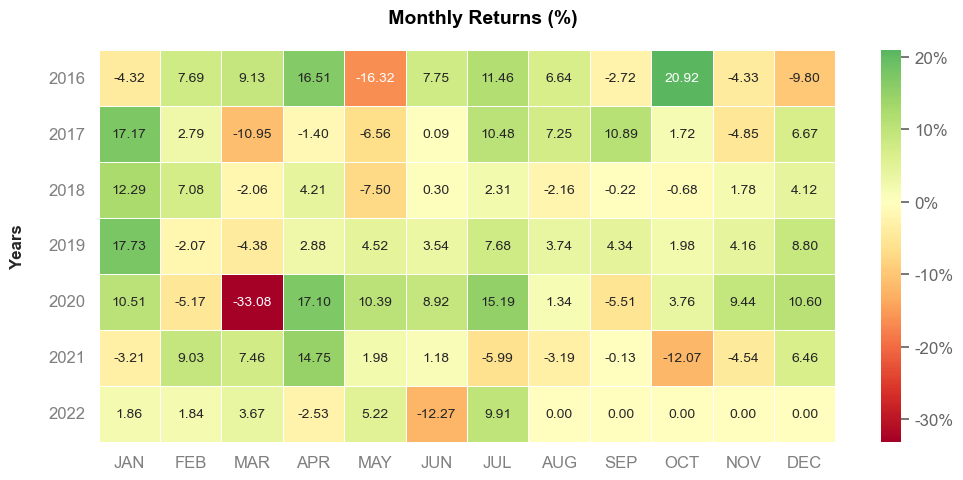

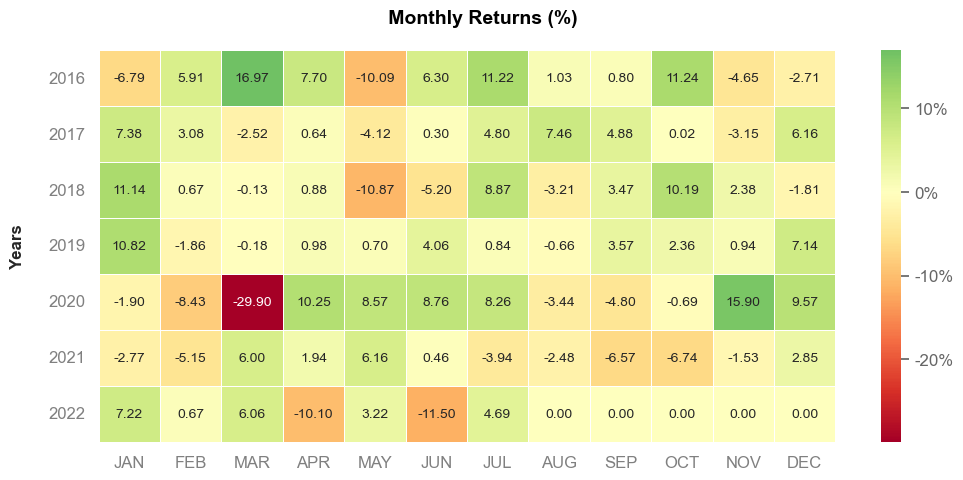

In [110]:
qs.extend_pandas()
retornos_modelo['retorno'].plot_monthly_heatmap()
retornos_modelo['ibovespa'].plot_monthly_heatmap()


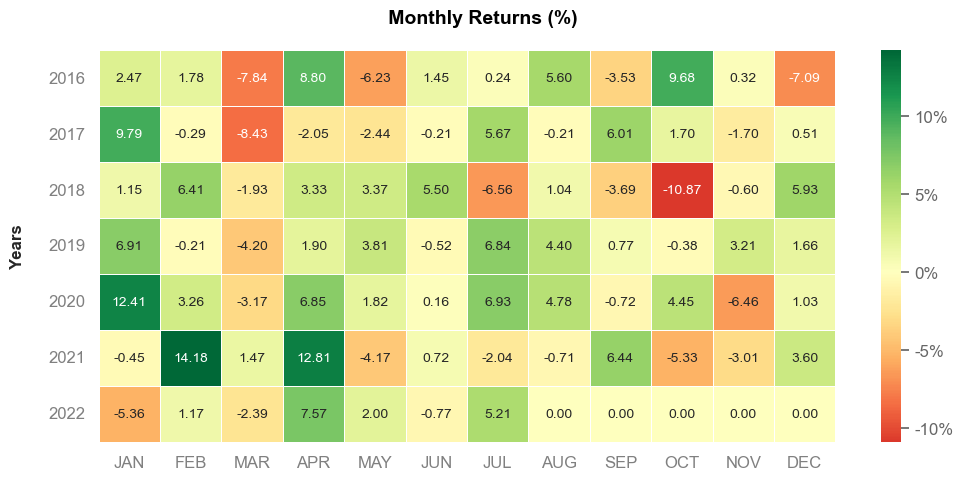

In [111]:
serie_long_short = retornos_modelo['retorno'] - retornos_modelo['ibovespa']

serie_long_short.plot_monthly_heatmap()

In [117]:
#meses batendo o mercado

retornos_modelo_bateu_mercado['bateu_mercado'] = retornos_modelo['retorno'] > retornos_modelo['ibovespa']
print(retornos_modelo_bateu_mercado)

proporcao_meses_bateu_o_mercado = sum(retornos_modelo_bateu_mercado['bateu_mercado']/len(retornos_modelo_bateu_mercado['bateu_mercado']))
print(proporcao_meses_bateu_o_mercado)

             retorno  ibovespa  bateu_mercado
2016-01-31 -0.043231 -0.067912           True
2016-02-29  0.076903  0.059100           True
2016-03-29  0.091320  0.169673          False
2016-04-30  0.165053  0.077035           True
2016-05-30 -0.163210 -0.100889          False
...              ...       ...            ...
2022-03-28  0.036677  0.060605          False
2022-04-30 -0.025347 -0.101026           True
2022-05-30  0.052199  0.032213           True
2022-06-30 -0.122708 -0.115033          False
2022-07-30  0.099057  0.046914           True

[79 rows x 3 columns]
0.5949367088607596


In [123]:
#retorno anual

retorno_anual = retornos_modelo.copy()
retorno_anual['retorno'] = retorno_anual['retorno'] + 1
retorno_anual['ibovespa'] = retorno_anual['ibovespa'] + 1

retorno_anual['ano'] = retorno_anual.index.year

retorno_anual['retorno_acumulado_ano'] = retorno_anual.groupby('ano')['retorno'].cumprod() - 1
retorno_anual['retorno_acumulado_ibov'] = retorno_anual.groupby('ano')['ibovespa'].cumprod() - 1

retorno_anual = retorno_anual.reset_index()

retorno_anual = (retorno_anual.groupby(['ano']).tail(1))[['ano', 'retorno_acumulado_ano', 'retorno_acumulado_ibov']]

retorno_anual_vizu = retorno_anual.copy()

retorno_anual_vizu[['retorno_acumulado_ano', 'retorno_acumulado_ibov']] = retorno_anual_vizu[['retorno_acumulado_ano', 'retorno_acumulado_ibov']]

retorno_anual_vizu = retorno_anual.mul(100).round(2).astype(str).add('%')
retorno_anual_vizu

,ano,retorno_acumulado_ano,retorno_acumulado_ibov
11,201600%,42.51%,38.93%
23,201700%,34.16%,26.86%
35,201800%,19.69%,15.03%
47,201900%,65.33%,31.95%
59,202000%,36.78%,2.88%
71,202100%,9.06%,-12.14%
78,202200%,6.33%,-1.58%


In [126]:
cumulative_ret_modelo = (retornos_modelo.retorno + 1).cumprod() - 1
cumulative_ret_ibov = (retornos_modelo.ibovespa + 1).cumprod() - 1

df_acumulado = pd.DataFrame(data = {"retorno_acum_modelo": cumulative_ret_modelo, 
                                    "retorno_acum_ibov": cumulative_ret_ibov},
                                    index = cumulative_ret_ibov.index)

df_acumulado = df_acumulado.resample("Y").last()
df_acumulado = df_acumulado[["retorno_acum_modelo", "retorno_acum_ibov"]]
df_acumulado.mul(100).round(2).astype(str).add('%')
                                
                            

,retorno_acum_modelo,retorno_acum_ibov
2016-12-31,42.51%,38.93%
2017-12-31,91.2%,76.24%
2018-12-31,128.85%,102.74%
2019-12-31,278.37%,167.51%
2020-12-31,417.55%,175.22%
2021-12-31,464.44%,141.8%
2022-12-31,500.16%,137.98%


[]

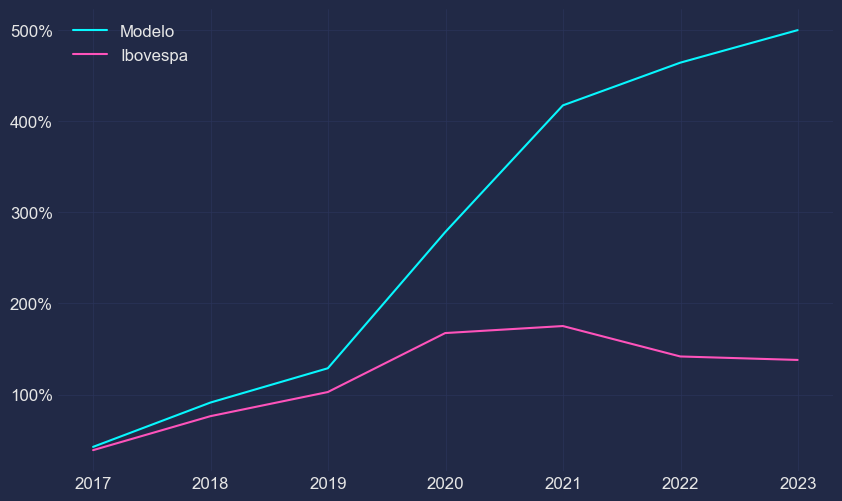

In [131]:
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(df_acumulado.index, df_acumulado["retorno_acum_modelo"], label = "Modelo")
ax.plot(df_acumulado.index, df_acumulado["retorno_acum_ibov"], label = "Ibovespa")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend()
plt.plot()